# Understanding RDDs 

These notebooks are from my course. 
Please note that these are going to be updated frequently because I share the code live with the students in class.


## Getting Started
## Hands on with WordFrequencyCount - The Hello World of Big Data
### You may not understand most of it right now but doing handson will help in better understanding later. The theory will make sense later.
### Most of the language learning are that way - we go back and forth a bit

In [2]:
// The first argument is a file which is located in HDFS. It could also be a folder.
// linesRdd is an rdd having records as each line. 
var linesRdd = sc.textFile("/data/mr/wordcount/input/big.txt", 5)

In [3]:
//We can bring 10 records from the rdd to local strings
var localarr = linesRdd.take(10)

In [4]:
//this is a local variable having 10 strings
localarr

Array(The Project Gutenberg EBook of The Adventures of Sherlock Holmes, by Sir Arthur Conan Doyle, (#15 in our series by Sir Arthur Conan Doyle), "", Copyright laws are changing all over the world. Be sure to check the, copyright laws for your country before downloading or redistributing, this or any other Project Gutenberg eBook., "", This header should be the first thing seen when viewing this Project, Gutenberg file.  Please do not remove it.  Do not change or edit the)

In [ ]:
//To understand what an RDD plan is we can use this
linesRdd.toDebugString

In [7]:
//Convert the RDD of lines into RDD of words
var words = linesRdd.flatMap(x => x.split(" "))

//Convert the RDD of words to an rdd having a key-value pair as record
//This can be easily done using map and passing an anonymous function as argument as follows:
var wordsKv = words.map(x => (x, 1))

In [9]:
//Lets take a look - You can see that the RDD has a pair (word, 1) as record
wordsKv.take(10)

Array((The,1), (Project,1), (Gutenberg,1), (EBook,1), (of,1), (The,1), (Adventures,1), (of,1), (Sherlock,1), (Holmes,1))

In [11]:
//Also take a look at wordsKv - It contains the complete plan
// map <- flatMap <- textFile
wordsKv.toDebugString

(5) MapPartitionsRDD[27] at map at <console>:21 []
 |  MapPartitionsRDD[26] at flatMap at <console>:17 []
 |  MapPartitionsRDD[23] at textFile at <console>:15 []
 |  /data/mr/wordcount/input/big.txt HadoopRDD[22] at textFile at <console>:15 []

In [ ]:
//Now lets group the records by word and sum up the values
//def myfunc(x:Int, y:Int): Int = x + y
var output = wordsKv.reduceByKey(_ + _)

In [ ]:
output.toDebugString

In [ ]:
output.take(10)

In [ ]:
output.saveAsTextFile("my_result_23dec")

In [ ]:
print(words.count())

In [53]:
val arr = 1 to 10000

In [54]:
arr

Range(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 17...

In [55]:
val nums = sc.parallelize(arr)

In [56]:
nums

ParallelCollectionRDD[43] at parallelize at <console>:16

In [57]:
def multiplyByTwo(x:Int):Int = x*2

In [58]:
multiplyByTwo(3)

6

In [59]:
var dbls = nums.map(multiplyByTwo);

In [60]:
var dbls = nums.map(x => x*2);

In [61]:
dbls.take(5)

Array(2, 4, 6, 8, 10)

In [66]:
dbls.toDebugString

(4) MapPartitionsRDD[45] at map at <console>:18 []
 |  ParallelCollectionRDD[43] at parallelize at <console>:16 []

In [64]:
var localdata = dbls.collect()

In [65]:
localdata

Array(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330,...

In [70]:
def isEven(x:Int):Boolean = x%20 == 0

In [71]:
var evennums = nums.filter(isEven)

In [72]:
evennums.take(10)

Array(20, 40, 60, 80, 100, 120, 140, 160, 180, 200)

In [74]:
var x = 4+5

In [75]:
x

9

In [76]:
var arr = 1 to 1000
var nums = sc.parallelize(arr)
def isEven(x:Int):Array[Int] = {
  if(x%2 == 0) Array(x)
  else Array()
}
var evens = nums.flatMap(isEven)

In [79]:
evens.collect()

Array(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330,...

In [81]:
isEven(3)

Array()

In [82]:
def isEven(x:Int) = if(x%2 == 0) Array(x) else Array()

In [83]:
isEven(4)

Array(4)

In [87]:
var evens = nums.flatMap(x => if(x%2 == 0) Array(x) else Array())

Name: Compile Error
Message: <console>:20: error: polymorphic expression cannot be instantiated to expected type;
 found   : [T]Array[T]
 required: TraversableOnce[?]
       var evens = nums.flatMap(x => if(x%2 == 0) Array(x) else Array())
                                                                     ^
StackTrace: 

In [95]:
var a = sc.parallelize(Array('1','2','3'), 2);
var b = sc.parallelize(Array('A','B','C', 'C'));
var c=a.union(b)

In [91]:
c.collect()

Array(1, 2, 3, A, B, C, C)

In [99]:
a.partitions.length


2

In [93]:
a.collect()

Array(1, 2, 3)

In [94]:
a.partitions

Array(org.apache.spark.rdd.ParallelCollectionPartition@f0e, org.apache.spark.rdd.ParallelCollectionPartition@f0f, org.apache.spark.rdd.ParallelCollectionPartition@f10, org.apache.spark.rdd.ParallelCollectionPartition@f11)

In [103]:
sc.textFile() // load data from HDFS

Name: Compile Error
Message: <console>:15: error: not enough arguments for method textFile: (path: String, minPartitions: Int)org.apache.spark.rdd.RDD[String].
Unspecified value parameter path.
              sc.textFile() // load data from HDFS
                         ^
StackTrace: 

In [104]:
// urls.txt - 1 million records 
//one url in each line - 100 bytes. 100 MB
var urlrdd = sc.textFile("url.txt", 2000);
//we have 500 machine each having 4 executor = 2000 executors 
// ~ 500 urls per machine

def downloadURL(url:String) = {....}
var result = urlrdd.map(downloadURL)


Name: Syntax Error.
Message: 
StackTrace: 

In [1]:
// fibonachi series
// Every number is sum of previous two numebers
    

Name: Syntax Error.
Message: 
StackTrace: 

In [7]:
var seq = sc.parallelize(1 to 10000, 20)
def add(x: Int, y:Int):Int = {return x+y}
var total = seq.reduce(add);
total


5050

In [8]:
seq.add

Name: Compile Error
Message: <console>:17: error: value add is not a member of org.apache.spark.rdd.RDD[Int]
              seq.add
                  ^
StackTrace: 

In [ ]:
// Number of tasks == partitions
// Each executor can run some amount of tasks
// The number of partittion can be decided by us or by spark
// 7.7 GB
// spark-shell --master yarn

var file = sc.textFile("/data/msprojects/in_table.csv");

var hights = file.map(x => x.split(",")(1))

var filtered = hights.filter(x => x != "block_height")

var intheights = filtered.map(x => x.toInt)

def maxheights(x:Int, y:Int) = if(x > y) x else y
intheights.reduce(maxheights)

1254137


In [9]:
var rdd = sc.parallelize(Array(1.0,2,3, 4, 5 , 6, 7), 3);

In [10]:
var avg = rdd.reduce(_ + _) / rdd.count();

In [11]:
avg

4.0

In [19]:
var rdd = sc.parallelize(Array(1.0,2,3, 4, 5 , 6, 7), 3);
var rdd_count = rdd.map((_, 1))
var (sum, count) = rdd_count.reduce((x, y) => (x._1 + y._1, x._2 + y._2))
var avg = sum / count

In [18]:
avg

4.0

In [20]:
rdd_count

MapPartitionsRDD[13] at map at <console>:16

In [21]:
sum

28.0

In [22]:
count

7

In [24]:
var x = rdd.take(1)

Array(1.0)

In [35]:
var x = (3,1)
var y = (5,1)

println(x._1 + y._1)
println(x._2 + y._2)


8
2


In [29]:
var rdd = sc.parallelize(Array(2, 3, 5, 6))

//Mean or average of numbers is μ 
var rdd_count = rdd.map((_, 1))
var (sum, count) = rdd_count.reduce((x, y) => (x._1 + y._1, x._2 + y._2))
var avg = sum / count

// (xi - μ)2
var diffs = rdd.map( _ - avg)
var sqdiff = diffs.map(x => x*x)

// ∑(xi - μ)2
var sum_sqdiff = sqdiff.reduce(_ + _)

//√1/N ∑(xi - μ)2
import math._;
var sd = sqrt(sum_sqdiff*1.0/count)

In [1]:
//sd: Double = 1.5811388300841898
sd

Name: Compile Error
Message: <console>:14: error: not found: value sd
              sd
              ^
StackTrace: 

In [21]:
var rdd = sc.parallelize(1 to 1000);
var counts = rdd.count();
var fraction = 0.3
def cointoss(x:Int): Boolean = scala.util.Random.nextFloat() <= fraction*1.2
var myrdd = rdd.filter(cointoss)
var samplesize = counts*fraction;

In [22]:
var localsample = myrdd.take(samplesize.toInt)
localsample.length

300

In [10]:
localsample

Array(23, 34, 53, 56, 73, 74, 81, 86, 87, 91, 126, 130, 141, 153, 162, 185, 186, 193, 208, 239, 291, 294, 319, 321, 323, 326, 327, 331, 342, 345, 348, 352, 374, 377, 382, 387, 400, 432, 457, 464, 476, 480, 497, 542, 573, 574, 582, 619, 620, 641, 657, 659, 670, 672, 685, 695, 705, 719, 722, 724, 749, 750, 761, 763, 773, 788, 798, 802, 804, 805, 806, 830, 833, 850, 853, 867, 893, 894, 904, 938, 948, 951, 959, 971, 988, 994, 998)

In [3]:
val seq = sc.parallelize(1 to 100, 5);
seq.sample(false, 0.1, 100000).collect();

Array(4, 13, 38, 45, 49, 59, 72, 74, 83, 84, 85, 100)

In [4]:
val rdd = sc.parallelize(1 to 50, 3)
def f(l:Iterator[Int]):Iterator[Int] = {
    var sum = 0
    while(l.hasNext){
        sum = sum + l.next
    }
    return List(sum).iterator
}

rdd.mapPartitions(f).collect()


Array(136, 425, 714)

In [7]:

val rdd = sc.parallelize(1 to 50, 3)

// The number of default partitions is a function of the following:
// Are we running on hadoop?
// Are we using sc.textFile
// How many cores do we have?
// How many machines do we have

def f(l:Iterator[Int]):Iterator[Int] = {
    var sum = 0
    while(l.hasNext){
        sum += 1;
        l.next();
    }
    return List(sum).iterator
}

rdd.mapPartitions(f).collect()


Name: java.lang.InterruptedException
Message: null
StackTrace: java.lang.Object.wait(Native Method)
java.lang.Object.wait(Object.java:502)
org.apache.spark.scheduler.JobWaiter.awaitResult(JobWaiter.scala:73)
org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:559)
org.apache.spark.SparkContext.runJob(SparkContext.scala:1824)
org.apache.spark.SparkContext.runJob(SparkContext.scala:1837)
org.apache.spark.SparkContext.runJob(SparkContext.scala:1850)
org.apache.spark.SparkContext.runJob(SparkContext.scala:1921)
org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:909)
org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:147)
org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:108)
org.apache.spark.rdd.RDD.withScope(RDD.scala:310)
org.apache.spark.rdd.RDD.collect(RDD.scala:908)
$line40.$read$$iwC$$iwC$$iwC$$iwC.<init>(<console>:20)
$line40.$read$$iwC$$iwC$$iwC.<init>(<console>:25)
$line40.$read$$iwC$$iwC.<init>(<console>:27)
$l

In [1]:
var tmp = List(('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5))
var rdd = sc.parallelize(tmp)
rdd.sortBy(x => x._1).collect()

Array((1,3), (2,5), (a,1), (b,2), (d,4))

In [2]:
var lines = sc.textFile("/data/mr/wordcount/input/");
var sortedbylength = lines.sortBy(_.length, false)
sortedbylength.take(10)

Array(I walked down to the station with them, and then wandered through the streets of the little town, finally returning to the hotel, where I lay upon the sofa and tried to interest myself in a yellow-backed novel. The puny plot of the story was so thin, however, when compared to the deep mystery through which we were groping, and I found my attention wander so continually from the action to the fact, that I at last flung it across the room and gave myself up entirely to a consideration of the events of the day. Supposing that this unhappy young man's story were absolutely true, then what hellish thing, what absolutely unforeseen and extraordinary calamity could have occurred between the time when he parted from his father, and the moment when, drawn back by his ...

In [8]:
var tmp = List(("ab","1"),("c","2"),("bfgfg",'0'));
var rdd = sc.parallelize(tmp);
var result = rdd.sortBy(x=>(x._1).length)

In [10]:
result.take(10)

Array((c,2), (ab,1), (bfgfg,0))

In [14]:
var myrdd = sc.parallelize(1 to 10, 3)
var myrdd1 = myrdd.map(_.toString)

def concat(s:String, n:String):String = s + n

var s = "_"
myrdd1.fold(s)(concat)


__123_78910_456

In [15]:
var rdd = sc.parallelize(1 to 100)

var init = (0, 0) // sum, count
def seq(t:(Int, Int), i:Int): (Int, Int) = (t._1 + i, t._2 + 1)
def comb(t1:(Int, Int), t2:(Int, Int)): (Int, Int) = (t1._1 + t2._1, t1._2 + t2._2)

var d = rdd.aggregate(init)(seq, comb)


In [16]:
d

(5050,100)

In [1]:
sc.parallelize(List(10, 1, 2, 9, 3, 4, 5, 6, 7)).takeOrdered(6)



Array(1, 2, 3, 4, 5, 6)

In [4]:
var l = List((10, "SG"), (1, "AS"), (2, "AB"), (9, "AA"), (3, "SS"), (4, "RG"), (5, "AU"), (6, "DD"), (7, "ZZ"))
var r = sc.parallelize(l)
r.takeOrdered(6)(Ordering[Int].reverse.on(x => x._1))

Array((10,SG), (9,AA), (7,ZZ), (6,DD), (5,AU), (4,RG))

In [8]:
r.takeOrdered(6)(Ordering[String].reverse.on(x => x._2))

Array((7,ZZ), (3,SS), (10,SG), (4,RG), (6,DD), (5,AU))

In [9]:
r.takeOrdered(6)(Ordering[String].on(x => x._2))

Array((9,AA), (2,AB), (1,AS), (5,AU), (6,DD), (4,RG))

In [11]:
var myrdd = sc.parallelize(1 to 40, 4)

def partitionSum(itr: Iterator[Int]) = 
    println("The sum of the parition is " + itr.sum.toString)

myrdd.foreachPartition(partitionSum)


In [12]:
var myrdd1 = myrdd.map( _ + 1)
myrdd1.take(10)

Array(2, 3, 4, 5, 6, 7, 8, 9, 10, 11)

In [13]:
myrdd.foreach( _ + 1 )

// Say we have list url of images in a file
// Download these urls into files using many computers

// If I want get the output as error or success, map


<code>
    // 1.How we can write the data to the Dbs by using foreachpartition

    var myrdd = sc.parallelize(1 to 40, 4)

    def saveToDB(itr: Iterator[Int]) = {
        var connection = ConnectionManager.getConnection()
        while( itr.hasNext()){
            connection.executeQuery("insert into mytable values (??))
        }
    }
    myrdd.foreachPartition(partitionSum)
</code>

## Key-Value RDD

In [14]:
var inputdata = List((1,2),(1,3),(2,4), (1, 6))
var kvrdd = sc.parallelize(inputdata)
kvrdd.collect()

Array((1,2), (1,3), (2,4), (1,6))

In [19]:
val mykvrdd = myrdd.map((_, "XYZ"))
mykvrdd.take(30)

Array((1,XYZ), (2,XYZ), (3,XYZ), (4,XYZ), (5,XYZ), (6,XYZ), (7,XYZ), (8,XYZ), (9,XYZ), (10,XYZ), (11,XYZ), (12,XYZ), (13,XYZ), (14,XYZ), (15,XYZ), (16,XYZ), (17,XYZ), (18,XYZ), (19,XYZ), (20,XYZ), (21,XYZ), (22,XYZ), (23,XYZ), (24,XYZ), (25,XYZ), (26,XYZ), (27,XYZ), (28,XYZ), (29,XYZ), (30,XYZ))

In [20]:
val mykvrdd = myrdd.map( x => (x, "XYZ"))
mykvrdd.take(30)

Array((1,XYZ), (2,XYZ), (3,XYZ), (4,XYZ), (5,XYZ), (6,XYZ), (7,XYZ), (8,XYZ), (9,XYZ), (10,XYZ), (11,XYZ), (12,XYZ), (13,XYZ), (14,XYZ), (15,XYZ), (16,XYZ), (17,XYZ), (18,XYZ), (19,XYZ), (20,XYZ), (21,XYZ), (22,XYZ), (23,XYZ), (24,XYZ), (25,XYZ), (26,XYZ), (27,XYZ), (28,XYZ), (29,XYZ), (30,XYZ))

In [32]:
case class Person(age:Int, name:String);
var p = new Person(10, "Sandeep")
p.name

Sandeep

In [27]:
var mypersonrdd = mykvrdd.map(t => new Person(t._1, t._2))

In [30]:
mypersonrdd.take(10)

Array(Person(1,XYZ), Person(2,XYZ), Person(3,XYZ), Person(4,XYZ), Person(5,XYZ), Person(6,XYZ), Person(7,XYZ), Person(8,XYZ), Person(9,XYZ), Person(10,XYZ))

In [51]:
var mynewkvrdd = mypersonrdd.map(p => (p.age, p.name))
mynewkvrdd.take(10)

Array((1,XYZ), (2,XYZ), (3,XYZ), (4,XYZ), (5,XYZ), (6,XYZ), (7,XYZ), (8,XYZ), (9,XYZ), (10,XYZ))

In [52]:
var mynewkvrdd1 = mynewkvrdd.map(x => (x._2, x._1))
mynewkvrdd1.take(10)

Array((XYZ,1), (XYZ,2), (XYZ,3), (XYZ,4), (XYZ,5), (XYZ,6), (XYZ,7), (XYZ,8), (XYZ,9), (XYZ,10))

In [38]:
var mynewkvrdd = mypersonrdd.map(p => p.age)
mynewkvrdd.take(10)

Array(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [57]:
var inputdata = List((1,2),(1,3),(2,4), (1, 6))
var kvrdd = sc.parallelize(inputdata)
def f(a:Int, b:Int) = a+b
val out = kvrdd.reduceByKey(f)
out.collect()

Array((1,11), (2,4))

In [41]:
var inputdata = List((1,2),(1,3),(2,4), (1, 6))
var kvrdd = sc.parallelize(inputdata)
val out = kvrdd.reduceByKey((a, b) => a + b)
out.collect()

Array((1,11), (2,4))

In [78]:
"sasa213213 d-s = ".replaceAll("[^0-9a-z]", "")

sasa213213ds

In [79]:
var lines = sc.textFile("/data/mr/wordcount/input/big.txt")
val words = lines.flatMap(x => x.split(" "))
var lowerwords = words.map(_.toLowerCase)
var cleanWords = lowerwords.map(_.replaceAll("[^0-9a-z]", ""))
val pairs = cleanWords.map((_, 1))
val counts = pairs.reduceByKey((a, b) => a + b)

In [58]:
counts.take(10)

Array((reunion,4), (bone,361), (anaerobes,,3), (god.",1), ("opposed,2), (595;,1), (blandly,6), (antichrist--i,2), (person-,1), (wobbers,1))

In [59]:
counts.saveAsTextFile("word-count-spark-7jan2018");

In [80]:
//Find out top 100 most frequent words
counts.map(x => (x._2, x._1)).top(100)

Array((79379,the), (69663,""), (39996,of), (38093,and), (28611,to), (21779,in), (20869,a), (12182,he), (12090,that), (11368,was), (10163,it), (10014,his), (9731,is), (9705,with), (7948,as), (7364,had), (7189,i), (6826,for), (6762,at), (6667,by), (6608,on), (6580,not), (6148,be), (5687,from), (5603,but), (5363,you), (5333,or), (5255,her), (5165,him), (4776,which), (4293,were), (4079,all), (3972,this), (3858,she), (3842,they), (3605,are), (3487,have), (3456,said), (3383,an), (3215,one), (2994,who), (2951,their), (2941,so), (2920,what), (2862,when), (2828,there), (2598,been), (2538,may), (2344,if), (2328,no), (2248,up), (2242,my), (2218,them), (2120,into), (2041,its), (1988,more), (1957,out), (1949,would), (1906,me), (1893,prince), (1868,did), (1861,only), (17...

In [87]:
counts.sortBy(x => -x._2).take(100)

Array((the,79379), ("",69663), (of,39996), (and,38093), (to,28611), (in,21779), (a,20869), (he,12182), (that,12090), (was,11368), (it,10163), (his,10014), (is,9731), (with,9705), (as,7948), (had,7364), (i,7189), (for,6826), (at,6762), (by,6667), (on,6608), (not,6580), (be,6148), (from,5687), (but,5603), (you,5363), (or,5333), (her,5255), (him,5165), (which,4776), (were,4293), (all,4079), (this,3972), (she,3858), (they,3842), (are,3605), (have,3487), (said,3456), (an,3383), (one,3215), (who,2994), (their,2951), (so,2941), (what,2920), (when,2862), (there,2828), (been,2598), (may,2538), (if,2344), (no,2328), (up,2248), (my,2242), (them,2218), (into,2120), (its,2041), (more,1988), (out,1957), (would,1949), (me,1906), (prince,1893), (did,1868), (only,1861), (pi...

In [88]:
var ten = counts.take(10)

In [89]:
ten(2)._2(9)??

Array((odontomaan,1), (armywhich,3), (mattered,3), (intimately,10), (bolkonski,158), (reunion,7), (bone,590), (harmonies,1), (sundayschool,1), (syringes,2))

In [63]:
counts.sortBy(x => -x._2).saveAsTextFile("word-count-spark-7jan2018_sorted");

## Computing max temp for each city

In [14]:
var txtRDD = sc.textFile("/data/spark/temps.csv")

In [15]:
for(x <- txtRDD.take(10)){
    println(x)
}

20, NYC, 2014-01-01
20, NYC, 2015-01-01
21, NYC, 2014-01-02
23, BLR, 2012-01-01
25, SEATLE, 2016-01-01
21, CHICAGO, 2013-01-05
24, NYC, 2016-5-05


In [19]:
def cleanRecord(line:String) = {
    var arr = line.split(",");
    (arr(1).trim, arr(0).toInt)
}
var recordsRDD = txtRDD.map(cleanRecord)

In [20]:
recordsRDD.collect()

Array((NYC,20), (NYC,20), (NYC,21), (BLR,23), (SEATLE,25), (CHICAGO,21), (NYC,24))

In [21]:
def max(a:Int, b:Int) = if (b > a) b else a

In [22]:
max(20, 21)

21

In [23]:
var res = recordsRDD.reduceByKey(max)

In [25]:
res.collect()

Array((CHICAGO,21), (BLR,23), (SEATLE,25), (NYC,24))

## In word count example what if we wanted to see top 10 words

In [112]:
var sortedCounts = counts.sortBy(x => -x._2)
sortedCounts.take(10)

Array((the,79379), ("",69663), (of,39996), (and,38093), (to,28611), (in,21779), (a,20869), (he,12182), (that,12090), (was,11368))

## What if we want to see the ranks?

In [113]:
var idxcounts = sortedCounts.zipWithIndex()

In [114]:
idxcounts.take(10)

Array(((the,79379),0), (("",69663),1), ((of,39996),2), ((and,38093),3), ((to,28611),4), ((in,21779),5), ((a,20869),6), ((he,12182),7), ((that,12090),8), ((was,11368),9))

## How does the max temp program work? 
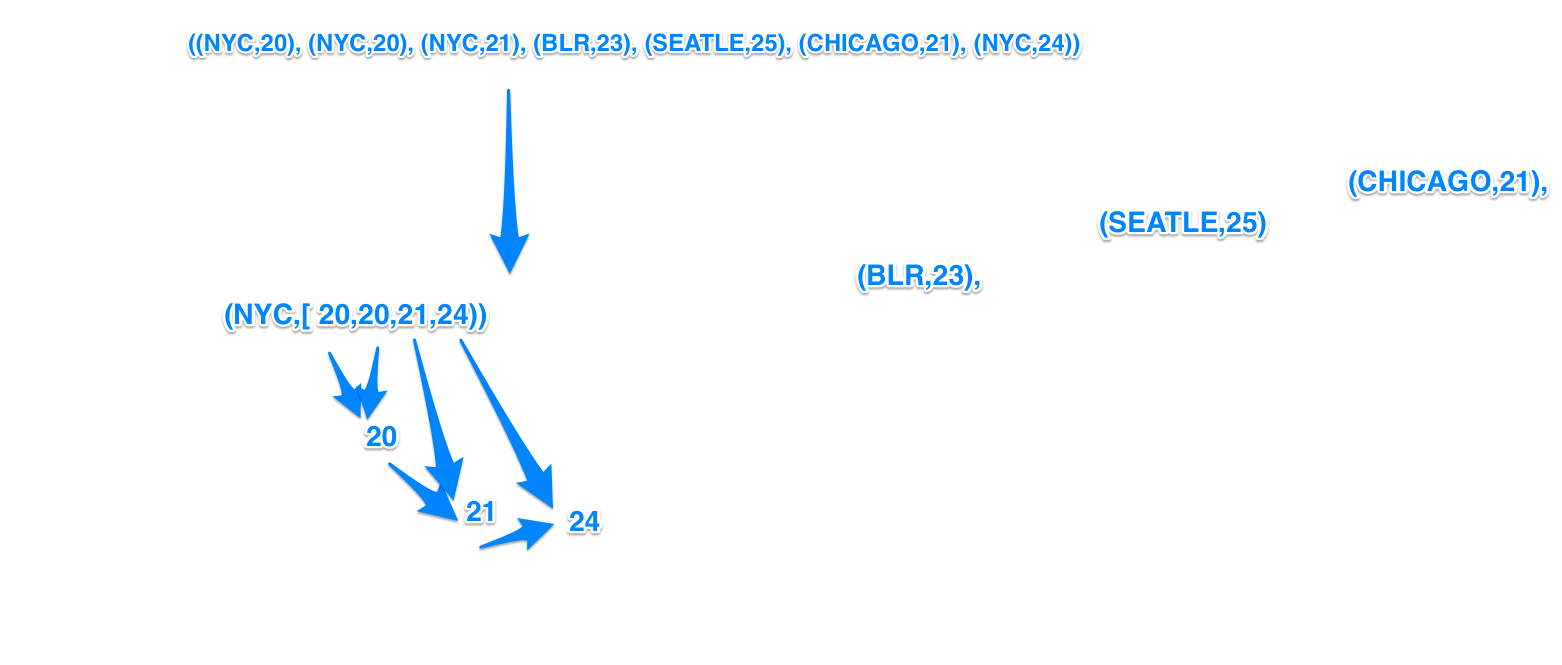

### is there a function to recognize just the adjectives and nouns?
NLP
nltk, stanfordNLP, spacey

## What if we wanted to also print the date along with max temp

In [5]:
var txtRDD = sc.textFile("/data/spark/temps.csv")

In [6]:
txtRDD.take(10)

Array(20, NYC, 2014-01-01, 20, NYC, 2015-01-01, 21, NYC, 2014-01-02, 23, BLR, 2012-01-01, 25, SEATLE, 2016-01-01, 21, CHICAGO, 2013-01-05, 24, NYC, 2016-5-05)

In [8]:
def cleanRecord(line:String) = {
    var arr = line.split(",");
    (arr(1).trim, (arr(0).toInt, arr(2)))
}
var recordsRDD = txtRDD.map(cleanRecord)


In [11]:
var txtRDD = sc.textFile("/data/spark/temps.csv")
recordsRDD.collect()


Array((NYC,(20," 2014-01-01")), (NYC,(20," 2015-01-01")), (NYC,(21," 2014-01-02")), (BLR,(23," 2012-01-01")), (SEATLE,(25," 2016-01-01")), (CHICAGO,(21," 2013-01-05")), (NYC,(24," 2016-5-05")))

In [12]:
def max(a:(Int, String), b:(Int, String)) = if (b._1 > a._1) b else a

max((20," 2014-01-01"), (21," 2014-01-02"))


(21," 2014-01-02")

In [13]:
var res = recordsRDD.reduceByKey(max)
res.collect()


Array((CHICAGO,(21," 2013-01-05")), (BLR,(23," 2012-01-01")), (SEATLE,(25," 2016-01-01")), (NYC,(24," 2016-5-05")))

In [11]:
var rdd = sc.parallelize(Array(("a", 1), ("b", 1), ("a", 1)));
//("a", 1), ("b", 1), ("a", 1)

var rdd1 = rdd.groupByKey()
//("a",[1, 1]), ("b", [1]))

def sz(x:Iterable[Int]) = x.size

//var rdd2 = rdd1.mapValues(_.size)
var rdd2 = rdd1.mapValues(sz)

//("a",2), ("b", 1))

rdd2.collect()

Array((a,2), (b,1))

In [12]:
//var rdd1 = sc.textFile(path_to_jsonfile.txt)
//var rdd2 = rdd1.map(myfunction_to_convert_ajson_object_into_a_scala)


Name: Syntax Error.
Message: 
StackTrace: 

In [26]:
var myrdd = sc.parallelize(List(1,2,3,4,5,6,7,8), 2)
//Array(1, 2, 3, 4, 5)

var rdd1 = myrdd.map(("x", _))
//Array((x,1), (x,2), (x,3), (x,4), (x,5))

def cc(x:Int):String = "__" + x.toString
def mv(x:String, y:Int):String = {x + ";" + y}
def mc(x:String, y:String):String = {x + ", " + y}

rdd1.combineByKey(cc, mv, mc).collect()

Array((x,__1;2;3;4, __5;6;7;8))

In [16]:
rdd1.collect()

Array((x,1), (x,2), (x,3), (x,4), (x,5))

In [18]:
myrdd.collect()

Array(1, 2, 3, 4, 5)

In [31]:
def nop(x:Int) = x
def sum(x:Int, y:Int) = x + y
rdd1.combineByKey(nop, sum, sum).collect()


Array((x,36))

In [34]:
rdd1.reduceByKey(sum).collect()

Array((x,36))

In [44]:
def cc (v:Int) = ("[" , v , "]");
def mv (c:(String), v:Int) = c[0:-1] + (v, "]")
def mc(c1,c2):	return c1[0:-1] + c2[1:]
mc(mv(cc(1), 2), cc(3))


Name: Compile Error
Message: <console>:1: error: identifier expected but ')' found.
       def mv (c:(String,), v:Int) = c[0:-1] + (v, "]")
                         ^
StackTrace: 

In [45]:
def cc (v): return ("[" , v , "]");
def mv (c, v): return c[0:-1] + (v, "]")
def mc(c1, c2):	 return c1[0:-1] + c2[1:]
rdd = sc.parallelize([("a", 1), ("b", 2), ("a", 3)])
rdd.combineByKey(cc,mv, mc).collect()


Name: Compile Error
Message: <console>:1: error: ':' expected but ')' found.
       def cc (v): return ("[" , v , "]");
                ^
StackTrace: 

In [50]:
var tmp = List(('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5))
var rdd = sc.parallelize(tmp, 4)

In [53]:
var rdd1 = rdd.sortByKey(ascending=false, numPartitions=2)
rdd1.partitions.length

2

In [55]:
var rdd1 = rdd.sortByKey(true, 2)
rdd1.collect()

Array((1,3), (2,5), (a,1), (b,2), (d,4))

In [56]:
var x = sc.parallelize(List(("a", 1), ("b", 4), ("c", 5)))
var y = sc.parallelize(List(("a", 2), ("a", 3), ("d", 7)))
x.join(y).collect()



Array((a,(1,2)), (a,(1,3)))

In [58]:
var x = sc.parallelize(List((1, "sandeep"), (2, "sravani")))
var y = sc.parallelize(List((1, "ryan"), (3, "giri")))
x.leftOuterJoin(y).collect()

Array((1,(sandeep,Some(ryan))), (2,(sravani,None)))

In [59]:
var rdd = sc.parallelize(List(("a", 1), ("b", 1), ("a", 1), ('a', 10)))
rdd.countByKey()


Map(a -> 2, a -> 1, b -> 1)

In [60]:
rdd.lookup("a")

WrappedArray(1, 1)

In [66]:
var lr = sc.parallelize(1 to 1000).map(x => (x, x) )
lr.lookup(42)
lr

MapPartitionsRDD[116] at map at <console>:16

In [67]:
var sorted = lr.sortByKey()
sorted.lookup(42)

ArrayBuffer(42)

https://discuss.cloudxlab.com/t/spark-code-to-find-users-having-same-dna/424

https://discuss.cloudxlab.com/t/spark-code-to-find-anagrams-in-a-text-file/423

https://discuss.cloudxlab.com/t/spark-code-to-find-users-having-same-or-mirror-dna/425

https://discuss.cloudxlab.com/t/given-an-array-of-numbers-how-to-find-sum-of-adjacent-two-numbers/394/5

https://discuss.cloudxlab.com/t/find-the-missing-numbers-in-sequence-using-spark-interview-question/346

https://discuss.cloudxlab.com/t/find-a-missing-number-from-huge-list-of-consecutive-numbers-interview-question/361/3


# How to merge with upstream
https://help.github.com/articles/merging-an-upstream-repository-into-your-fork/
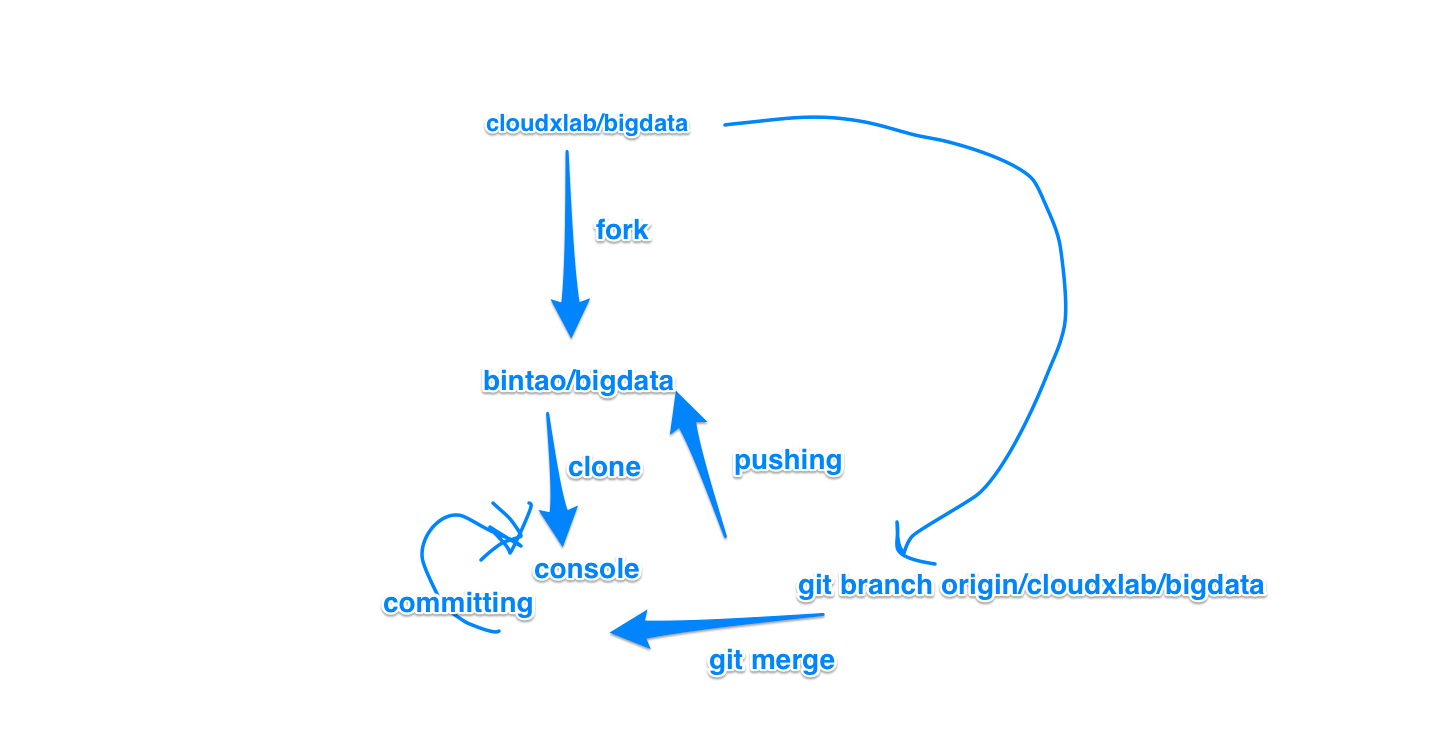